# Check

Do imports.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ae483tools import *

Define a function to check data from a given flight.

In [2]:
def check_data(filename):
    # Load data
    raw_data_drone, raw_data_mocap = load_hardware_data(filename)

    # Compute statistics
    how_many_timesteps = len(raw_data_mocap['z'])
    how_many_dropouts = len(np.argwhere(np.isnan(raw_data_mocap['z'])).flatten())
    percent_coverage = 100. * (1. - (how_many_dropouts / how_many_timesteps))
    elapsed_time = raw_data_mocap['time'][-1] - raw_data_mocap['time'][0]
    sample_rate = how_many_timesteps / elapsed_time

    # Plot data (with relevant statistics in the title)
    fig, ax = plt.subplots(1, 1, figsize=(7, 3), tight_layout=True)
    ax.plot(raw_data_mocap['time'], raw_data_mocap['z'])
    ax.grid()
    ax.set_xlabel('t (seconds)')
    ax.set_ylabel('z (meters)')
    ax.set_ylim(0., 1.)
    ax.set_title(f'({filename}) Tracked {percent_coverage:.1f}% of {how_many_timesteps} time steps at about {sample_rate:.0f} Hz')
    plt.show()

Check `floor.json`.

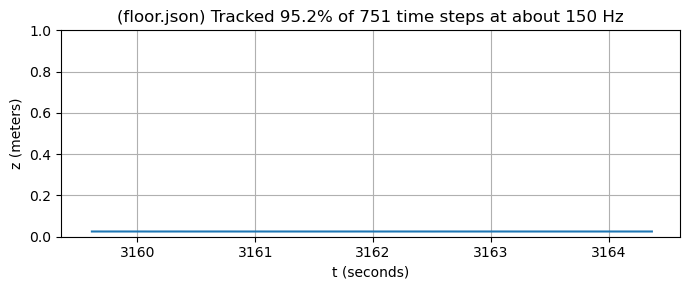

In [3]:
check_data('floor.json')

Check `carpet.json`.

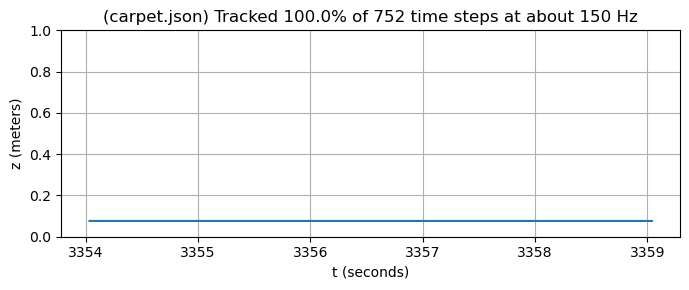

In [4]:
check_data('carpet.json')

Check `stilts.json`.

In [5]:
check_data('stilts.json')

FileNotFoundError: [Errno 2] No such file or directory: 'stilts.json'

Check `square.json`.

In [ ]:
check_data('square.json')